### Final Proposal: School Safety and Home Prices in New York City

**Principal Investigators:** Emily Bai and Christian Claus 

**Emails:** eb3144@stern.nyu.edu and cjc715@stern.nyu.edu

This project will look at how historical changes in school safety in various districts in New York City have had a correlation in home prices in their respective areas. New York City has 5 boroughs: Manhattan, Queens, Bronx, Brooklyn and Staten Island. We will be looking at data across various schools from NYC Open Data through __[this link](https://data.cityofnewyork.us/Education/2010-2016-School-Safety-Report/qybk-bjjc/data)__. Specifically, we will be focusing on the crime rate statistics for the years 2013 to 2016. 

We will use data from __[NYC Open Data](https://data.cityofnewyork.us/Housing-Development/Annualized-Rolling-Sales-Update/uzf5-f8n2)__ and __[Kaggle](https://www.kaggle.com/new-york-city/nyc-property-sales)__ to find information about housing prices in each of the five boroughs in the same time period as the school safety data. The ultimate goal of the project will be to visualize the correlation between school safety statistics and housing prices through a period of 3 years.

While property value is affected by many variables, we want to focus on whether school safety has any correlation with the pricing. This does not imply causation but if there is a correlation, we would like to come up with a few possible explanations for it.

We anticipate that the project will have four main sections:
- Basic statistics about school safety. We will be reading in the excel document with information about schools in all five districts.
- Next, we will aggregate data for house prices in each of the 5 boroughs by reading in the excel document. 
- The last step is to merge the two dataframes by matching the zip code and grouping them by boroughs using the isin function. - The results will be visualized through several graphs exploring the correlation between crime and housing prices. We want to know 3 things: __1)__ What is the overall correlation between housing prices and school safety in NYC? Is there any relationship at all?, __2)__ Have there been changes through the three observable years in terms of pricing and crime rate?, and __3)__ Do certain boroughs have a higher correlation? Are certain boroughs more or less dynamic in terms of housing prices and do certain boroughs have higher school crime rates, which may affect the pricing?
- Finally, we will try to include possible explanations of what we observed in our visualizations.

### Data Report

**Overview:** Most of the data we are using in this project comes from __[NYC Open Link](https://opendata.cityofnewyork.us/)__. From there, we were able to find data on school safety statistics and housing prices for New York City over a 3 year time period from 2013-2016. 

**Requisite Packages:** 

In [729]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

import geopandas as gpd
from shapely.geometry import Point, Polygon

import os

**Grabbing Data:**

### Part 1: School Safety Data

First, we need to read in school safety data:

In [730]:
crime = pd.read_excel("C:\\me\\data bootcamp\\final project\\2010_-_2016_School_Safety_Report.xlsx")
crime

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2015-16,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17.0,712.0,NaN,...,BROOKLYN,11226.0,40.648590,-73.957138,14.0,40.0,794.0,3117230.0,3.051030e+09,Erasmus ...
1,2015-16,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16.0,231.0,NaN,...,BROOKLYN,11233.0,40.685695,-73.922463,3.0,41.0,377.0,3039906.0,3.014900e+09,Stuyvesant Heights ...
2,2015-16,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13.0,450.0,NaN,...,BROOKLYN,11216.0,40.682663,-73.955338,3.0,36.0,227.0,3057406.0,3.019980e+09,Clinton Hill ...
3,2015-16,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,1378.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
4,2015-16,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,374.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
5,2015-16,K002,84K704,EXPLORE CHARTER SCHOOL(BS),K704,655 PARKSIDE AVENUE,K,17.0,529.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
6,2015-16,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17.0,475.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
7,2015-16,X953,75XHOS,Hospital Schools - Bronx,X402,3450 EAST TREMONT AVENUE,X,8.0,NaN,3450 EAST TREMONT AVENUE CONSOLIDATED LOCATION,...,BRONX,10465.0,40.832117,-73.827490,10.0,13.0,166.0,2079386.0,2.055310e+09,Schuylerville-Throgs Neck-Edgewater Park ...
8,2015-16,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15.0,1280.0,NaN,...,BROOKLYN,11220.0,40.649042,-74.012289,7.0,38.0,80.0,3011821.0,3.007550e+09,Sunset Park West ...
9,2015-16,K008,13K008,P.S. 008 Robert Fulton,K008,37 HICKS STREET,K,13.0,924.0,NaN,...,BROOKLYN,11201.0,40.700710,-73.993241,2.0,33.0,1.0,3001540.0,3.002110e+09,Brooklyn Heights-Cobble Hill ...


Since there is a lot of information, we have to clean up the data to show only the important information we will be analyzing later. The column "Total Number of Crimes" will include all types of crimes documented in the data file, including

In [731]:
#crime.set_index("School Year", inplace = True)
crime.rename(columns = {"Borough Name": "Borough_Name", "Postcode":"ZIP_CODE", "School Year":"Year"}, inplace = True)
crime["Total Number of Crimes"] = crime["Major N"] + crime["Oth N"] + crime["NoCrim N"] + crime["Prop N"] + crime["Vio N"]
crime["Average Num of Crimes"] = crime["AvgOfMajor N"] + crime["AvgOfOth N"] + crime["AvgOfNoCrim N"] + crime["AvgOfProp N"] + crime["AvgOfVio N"]

crime = crime[['Year','Building Code','Location Code', 'Address', 'Borough_Name', 'ZIP_CODE','Total Number of Crimes', 'Average Num of Crimes']]
crime.dropna(inplace = True)
crime

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Year,Building Code,Location Code,Address,Borough_Name,ZIP_CODE,Total Number of Crimes,Average Num of Crimes
0,2015-16,K006,K006,43 SNYDER AVENUE,BROOKLYN,11226.0,4.0,4.41
1,2015-16,K005,K005,820 HANCOCK STREET,BROOKLYN,11233.0,2.0,3.49
2,2015-16,K003,K003,50 JEFFERSON AVENUE,BROOKLYN,11216.0,2.0,3.91
8,2015-16,K001,K001,309 47 STREET,BROOKLYN,11220.0,2.0,12.69
9,2015-16,K008,K008,37 HICKS STREET,BROOKLYN,11201.0,6.0,6.27
10,2015-16,K095,K095,345 VAN SICKLEN STREET,BROOKLYN,11223.0,0.0,6.27
11,2015-16,K165,K165,76 LOTT AVENUE,BROOKLYN,11212.0,13.0,3.91
12,2015-16,Q849,Q077,976 SENECA AVENUE,QUEENS,11385.0,5.0,8.77
13,2015-16,K857,K036,2045 LINDEN BOULEVARD,BROOKLYN,11207.0,1.0,3.91
16,2015-16,X905,X696,2925 GOULDEN AVENUE,BRONX,10468.0,0.0,3.91


Now, we will be creating separate dataframes for each borough. For each of these dataframes, we want to grab only the rows pertaining to the respective borough.

In [732]:
bronx = crime[crime['Borough_Name'] == "BRONX    "]

In [733]:
bronx.loc[:,'Borough_Name'] = 'BRONX'
bronx['Borough_Name'][16]

'BRONX'

In [734]:
bronx

,Year,Building Code,Location Code,Address,Borough_Name,ZIP_CODE,Total Number of Crimes,Average Num of Crimes
16,2015-16,X905,X696,2925 GOULDEN AVENUE,BRONX,10468.0,0.0,3.91
17,2015-16,X886,X307,124 EAMES PLACE,BRONX,10468.0,0.0,3.91
20,2015-16,X878,X682,1021 JENNINGS STREET,BRONX,10460.0,12.0,3.91
21,2015-16,X876,X525,1710 WEBSTER AVENUE,BRONX,10457.0,20.0,4.41
22,2015-16,X859,X315,2246 JEROME AVENUE,BRONX,10453.0,0.0,3.91
23,2015-16,X852,X308,3617 BAINBRIDGE AVENUE,BRONX,10467.0,1.0,3.91
24,2015-16,X843,X246,2641 GRAND CONCOURSE,BRONX,10468.0,0.0,4.41
25,2015-16,X839,X418,2040 ANTIN PL,BRONX,10462.0,7.0,3.91
26,2015-16,X834,X352,1330 BRISTOW STREET,BRONX,10459.0,0.0,4.41
27,2015-16,X826,X226,1950 SEDGWICK AVENUE,BRONX,10453.0,1.0,4.41


We are using a groupby function to organize the data. 
The "Total Number of Crimes" column is the total number of crimes (these crimes include major crimes, other crimes, non-criminal crimes, property crimes and violent crimes). The "Average Num of Crimes" column represents the average number of crimes, based on historical evidence, that typically occur in the respective area in a given year. We also created a column for standard deviation to compare the number of crimes in either 2013-14, 2014-15 or 2015-16, compared to the average number of crimes typically committed in a year.

In [735]:
bronxdf = bronx.groupby(["Borough_Name", "Year", "Address"])
bronx_dict = {"ZIP_CODE":"first", "Total Number of Crimes":"first", "Average Num of Crimes":"first"}
bronx_df = bronxdf.agg(bronx_dict)

bronx_df["Standard_deviation"] = bronx_df["Total Number of Crimes"] - bronx_df["Average Num of Crimes"] 
# this is the standard deviation of the total number of crimes at the school compared to the average number of crimes in their respective locations
bronx_df

ZIP_CODE  \
Borough_Name Year    Address                              
BRONX        2013-14 1000 EAST TREMONT AVENUE   10460.0   
                     1007 EVERGREEN AVENUE      10472.0   
                     1020 ANDERSON AVENUE       10452.0   
                     1021 JENNINGS STREET       10460.0   
                     1070 CASTLE HILL AVENUE    10472.0   
                     1075 PUGSLEY AVENUE        10472.0   
                     1122 EAST 180 STREET       10460.0   
                     1155 CROMWELL AVENUE       10452.0   
                     1166 NEILL AVENUE          10461.0   
                     1220 GERARD AVENUE         10452.0   
                     124 EAMES PLACE            10468.0   
                     1245 WASHINGTON AVENUE     10456.0   
                     1257 OGDEN AVENUE          10452.0   
                     1260 FRANKLIN AVENUE       10456.0   
                     1290 SPOFFORD AVENUE       10474.0   
                     1330 BRISTOW STREET        10459.0   
                     1340 SHERIDAN AVENUE       10456.0   
                     1375 MACE AVENUE           10469.0   
                     1400 NEEDHAM AVENUE        10469.0   
                     1434 LONGFELLOW AVENUE     10459.0   
                     1449 SHAKESPEARE AVENUE    10452.0   
                     1537 WASHINGTON AVENUE     10457.0   
                     1598 TOWNSEND AVENUE       10452.0   
                     165 BROWN PLACE            10454.0   
                     1691 WEEKS AVENUE          10457.0   
                     1695 SEWARD AVENUE         10473.0   
                     1710 WEBSTER AVENUE        10457.0   
                     1716 SOUTHERN BOULEVARD    10460.0   
                     175 WEST 166 STREET        10452.0   
                     1771 POPHAM AVENUE         10453.0   
...                                                 ...   
             2015-16 650 WARING AVENUE          10467.0   
                     660 FOX STREET             10455.0   
                     660 WEST 236 STREET        10463.0   
                     660 WEST 237 STREET        10463.0   
                     677 EAST 141 STREET        10454.0   
                     690 EAST 183 STREET        10458.0   
                     695 EAST 182ND STREET      10457.0   
                     700 BAYCHESTER AVENUE      10475.0   
                     700 EAST 179 STREET        10457.0   
                     715 EAST 225 STREET        10466.0   
                     725 BRADY AVENUE           10462.0   
                     75 WEST 205 STREET         10468.0   
                     750 JENNINGS STREET        10459.0   
                     750 PROSPECT AVENUE        10455.0   
                     757 CAULDWELL AVENUE       10456.0   
                     758 COURTLANDT AVENUE      10451.0   
                     770 GROTE STREET           10460.0   
                     800 BAYCHESTER AVENUE      10475.0   
                     800 LYDIG AVENUE           10462.0   
                     800 TAYLOR AVENUE          10473.0   
                     811 EAST 149 STREET        10455.0   
                     890 CAULDWELL AVENUE       10456.0   
                     900 ADEE AVENUE            10469.0   
                     916 EAGLE AVENUE           10456.0   
                     920 EAST 167 STREET        10459.0   
                     928 SIMPSON STREET         10459.0   
                     950 RHINELANDER AVENUE     10462.0   
                     968 CAULDWELL AVENUE       10456.0   
                     980 MACE AVENUE            10469.0   
                     984 FAILE STREET           10459.0   

                                               Total Number of Crimes  \
Borough_Name Year    Address                                            
BRONX        2013-14 1000 EAST TREMONT AVENUE                     4.0   
                     1007 EVERGREEN AVENUE                        3.0   
                     1020 ANDERSON AV

Now we will repeat this process four more times to create a data frame for each borough like the Bronx one.

In [736]:
brooklyn = crime[crime['Borough_Name'] == "BROOKLYN "]
brooklyn

,Year,Building Code,Location Code,Address,Borough_Name,ZIP_CODE,Total Number of Crimes,Average Num of Crimes
0,2015-16,K006,K006,43 SNYDER AVENUE,BROOKLYN,11226.0,4.0,4.41
1,2015-16,K005,K005,820 HANCOCK STREET,BROOKLYN,11233.0,2.0,3.49
2,2015-16,K003,K003,50 JEFFERSON AVENUE,BROOKLYN,11216.0,2.0,3.91
8,2015-16,K001,K001,309 47 STREET,BROOKLYN,11220.0,2.0,12.69
9,2015-16,K008,K008,37 HICKS STREET,BROOKLYN,11201.0,6.0,6.27
10,2015-16,K095,K095,345 VAN SICKLEN STREET,BROOKLYN,11223.0,0.0,6.27
11,2015-16,K165,K165,76 LOTT AVENUE,BROOKLYN,11212.0,13.0,3.91
13,2015-16,K857,K036,2045 LINDEN BOULEVARD,BROOKLYN,11207.0,1.0,3.91
1404,2015-16,KBZT,K746,2186 MILL AVENUE,BROOKLYN,11234.0,0.0,4.41
1405,2015-16,KBXX,K797,475 EAST 57 STREET,BROOKLYN,11203.0,0.0,3.91


In [737]:
brooklyndf = brooklyn.groupby(["Borough_Name", "Year", "Address"])
brooklyn_dict = {"ZIP_CODE":"first", "Total Number of Crimes":"first", "Average Num of Crimes":"first"}
brooklyn_df = brooklyndf.agg(brooklyn_dict)

brooklyn_df["Standard_deviation"] = brooklyn_df["Total Number of Crimes"] - brooklyn_df["Average Num of Crimes"] 
brooklyn_df

ZIP_CODE  \
Borough_Name Year    Address                               
BROOKLYN     2013-14 1 ALBEMARLE ROAD            11218.0   
                     1 WELLS STREET              11208.0   
                     100 IRVING AVENUE           11237.0   
                     100 NOLL STREET             11206.0   
                     1001 EAST  45 STREET        11203.0   
                     1001 HERKIMER STREET        11233.0   
                     101 MAUJER STREET           11206.0   
                     101 WALTON STREET           11206.0   
                     101-24 SEAVIEW AVENUE       11236.0   
                     1023 NEW YORK AVENUE        11203.0   
                     1031 59 STREET              11219.0   
                     1037 EAST  54 STREET        11234.0   
                     1053 41ST STREET            11219.0   
                     1060 CLARKSON AVENUE        11212.0   
                     1070 EAST  83 STREET        11236.0   
                     1070 EAST 104 STREET        11236.0   
                     108 MONTROSE AVENUE         11206.0   
                     110 CHESTER STREET          11212.0   
                     1100 EAST NEW YORK AVENUE   11212.0   
                     1100 ELM AVENUE             11230.0   
                     1100 NEWKIRK AVENUE         11230.0   
                     111 BERRIMAN STREET         11208.0   
                     111 BRISTOL STREET          11212.0   
                     1119 BEDFORD AVENUE         11216.0   
                     112 SCHERMERHORN STREET     11201.0   
                     1120 EAST  10 STREET        11230.0   
                     114 KOSCIUSKO STREET        11216.0   
                     1150 EAST NEW YORK AVENUE   11212.0   
                     1155 DEKALB AVENUE          11221.0   
                     1171 65 STREET              11219.0   
...                                                  ...   
             2015-16 8010 12 AVENUE              11228.0   
                     8101 15 AVENUE              11228.0   
                     820 HANCOCK STREET          11233.0   
                     825 4 AVENUE                11232.0   
                     8301 SHORE ROAD             11209.0   
                     8310 21ST AVENUE            11214.0   
                     84 SCHAEFER STREET          11207.0   
                     845 EAST  96 STREET         11236.0   
                     850 KENT AVENUE             11205.0   
                     856 QUINCY STREET           11221.0   
                     858 JAMAICA AVENUE          11208.0   
                     8601 RIDGE BOULEVARD        11209.0   
                     87 BAY  49 STREET           11214.0   
                     875 WILLIAMS AVENUE         11207.0   
                     8787 24 AVENUE              11214.0   
                     88 WOODBINE STREET          11221.0   
                     900 ST MARKS AVENUE         11213.0   
                     901 CLASSON AVENUE          11225.0   
                     9115 5 AVENUE               11209.0   
                     923 JEROME STREET           11207.0   
                     9301 AVENUE B               11236.0   
                     942 62ND STREET             11219.0   
                     95 GROVE STREET             11221.0   
                     9517 KINGS HIGHWAY          11212.0   
                     956 EAST  82 STREET         11236.0   
                     965 EAST 107TH STREET       11236.0   
                     970 VERMONT STREET          11207.0   
                     976 PRESIDENT STREET        11225.0   
                     982 HEGEMAN AVENUE          11208.0   
                     990 DEKALB AVENUE           11221.0   

                                                Total Number of Crimes  \
Borough_Name Year    Address                                             
BROOKLYN     2013-14 1 ALBEMARLE ROAD                              0.0   
                     1 WELLS STREET          

In [738]:
manhattan = crime[crime['Borough_Name'] == "MANHATTAN"]
manhattan

,Year,Building Code,Location Code,Address,Borough_Name,ZIP_CODE,Total Number of Crimes,Average Num of Crimes
990,2015-16,MANN,M353,1818 Amsterdam Ave,MANHATTAN,10031.0,1.0,6.27
991,2015-16,M971,M397,12 SPRUCE STREET,MANHATTAN,10038.0,0.0,3.91
992,2015-16,M970,M670,200-214 WEST 135TH STREET,MANHATTAN,10030.0,10.0,4.41
994,2015-16,M933,M339,425 WEST 33RD STREET,MANHATTAN,10001.0,0.0,3.49
995,2015-16,M920,M570,120 WEST 30 STREET,MANHATTAN,10001.0,1.0,3.91
996,2015-16,M918,M278,421 W 219TH ST,MANHATTAN,10034.0,1.0,4.41
997,2015-16,M916,M517,168 MORNINGSIDE AVENUE,MANHATTAN,10027.0,1.0,3.91
998,2015-16,M911,M285,22 EAST 128 STREET,MANHATTAN,10035.0,4.0,3.91
999,2015-16,M905,M442,890 BROADWAY,MANHATTAN,10003.0,0.0,3.49
1000,2015-16,M898,M018,4124 9 AVENUE,MANHATTAN,10034.0,1.0,3.91


In [739]:
manhattandf = manhattan.groupby(["Borough_Name", "Year", "Address"])
manhattan_dict = {"ZIP_CODE":"first", "Total Number of Crimes":"first", "Average Num of Crimes":"first"}
manhattan_df = manhattandf.agg(manhattan_dict)

manhattan_df["Standard_deviation"] = manhattan_df["Total Number of Crimes"] - manhattan_df["Average Num of Crimes"] 
manhattan_df

ZIP_CODE  \
Borough_Name Year    Address                             
MANHATTAN    2013-14 10 SOUTH STREET, SLIP 7   10004.0   
                     100 AMSTERDAM AVENUE      10023.0   
                     100 TRINITY PLACE         10006.0   
                     103 WEST 107 STREET       10025.0   
                     105 EAST 106 STREET       10029.0   
                     110 EAST  88 STREET       10128.0   
                     111 COLUMBIA STREET       10002.0   
                     113 EAST  4TH STREET      10003.0   
                     116 WEST  11 STREET       10011.0   
                     12 SPRUCE STREET          10038.0   
                     12-18 ELLWOOD STREET      10040.0   
                     120 WEST  30 STREET       10001.0   
                     120 WEST  46 STREET       10036.0   
                     122 HENRY STREET          10002.0   
                     123 MORNINGSIDE DRIVE     10027.0   
                     123 RIDGE STREET          10002.0   
                     123 WEST  43 STREET       10036.0   
                     127 EAST  22 STREET       10010.0   
                     129 WEST  67 STREET       10023.0   
                     131 EAST 104 STREET       10029.0   
                     132 WEST  89 STREET       10024.0   
                     140 WEST 102 STREET       10025.0   
                     141 EAST 111 STREET       10029.0   
                     143 BAXTER STREET         10013.0   
                     1458 YORK AVENUE          10075.0   
                     160 WEST  78 STREET       10024.0   
                     1615 MADISON AVENUE       10029.0   
                     163 WEST  97 STREET       10025.0   
                     166 ESSEX STREET          10002.0   
                     168 MORNINGSIDE AVENUE    10027.0   
...                                                ...   
             2015-16 443 WEST 135 STREET       10031.0   
                     45 EAST  81 STREET        10028.0   
                     465 WEST 167 STREET       10032.0   
                     466 WEST END AVENUE       10024.0   
                     475 WEST 155 STREET       10032.0   
                     490 HUDSON STREET         10014.0   
                     499 WEST 133 STREET       10027.0   
                     500 WEST 160 STREET       10032.0   
                     501-503 WEST 152 STREET   10031.0   
                     504 WEST 158TH STREET     10032.0   
                     512 WEST 212 STREET       10034.0   
                     52 CHAMBERS STREET        10007.0   
                     525 EAST HOUSTON STREET   10002.0   
                     525 WEST 44TH STREET      10036.0   
                     535 EAST 119 STREET       10035.0   
                     55 EAST  25 STREET        10010.0   
                     55 EAST 120 STREET        10035.0   
                     586 WEST 177 STREET       10033.0   
                     590 SIXTH AVENUE          10011.0   
                     625 WEST 133 STREET       10027.0   
                     645 MAIN STREET           10044.0   
                     71 HESTER STREET          10002.0   
                     71-111 CONVENT AVE        10027.0   
                     730 EAST  12 STREET       10009.0   
                     75 BROAD STREET           10004.0   
                     8 HENRY STREET            10038.0   
                     80 CATHERINE STREET       10038.0   
                     890 BROADWAY              10003.0   
                     90 TRINITY PLACE          10006.0   
                     93 NAGLE AVENUE           10040.0   

                                              Total Number of Crimes  \
Borough_Name Year    Address                                           
MANHATTAN    2013-14 10 SOUTH STREET, SLIP 7                     5.0   
                     100 AMSTERDAM AVENUE                       13.0   
                     100 TRINITY PLACE                          14.0   
                     103 WEST 1

In [740]:
queens = crime[crime['Borough_Name'] == "QUEENS   "]
queens

,Year,Building Code,Location Code,Address,Borough_Name,ZIP_CODE,Total Number of Crimes,Average Num of Crimes
12,2015-16,Q849,Q077,976 SENECA AVENUE,QUEENS,11385.0,5.0,8.77
596,2015-16,QAZJ,Q404,269-01 76th Avenue,QUEENS,11004.0,1.0,10.22
597,2015-16,QAPM,Q023,74-03 COMMONWEALTH BOULEVARD,QUEENS,11426.0,0.0,3.91
598,2015-16,Q891,Q560,47-07 30TH PLACE,QUEENS,11101.0,4.0,4.41
599,2015-16,Q884,Q065,103-22 99 STREET,QUEENS,11417.0,0.0,3.91
600,2015-16,Q877,Q877,76-05 51 AVENUE,QUEENS,11373.0,1.0,3.91
601,2015-16,Q868,Q078,48-09 CENTER BOULEVARD,QUEENS,11109.0,0.0,4.41
602,2015-16,Q811,Q811,61-25 MARATHON PARKWAY,QUEENS,11362.0,1.0,3.91
603,2015-16,Q799,Q326,188-04 91ST AVENUE,QUEENS,11423.0,5.0,3.91
609,2015-16,Q739,Q286,23-15 NEWTOWN AVENUE,QUEENS,11102.0,0.0,4.41


In [741]:
queensdf = queens.groupby(["Borough_Name", "Year", "Address"])
queens_dict = {"ZIP_CODE":"first", "Total Number of Crimes":"first", "Average Num of Crimes":"first"}
queens_df = queensdf.agg(queens_dict)

queens_df["Standard_deviation"] = queens_df["Total Number of Crimes"] - queens_df["Average Num of Crimes"] 
queens_df

ZIP_CODE  \
Borough_Name Year    Address                                   
QUEENS       2013-14 101-33 124 STREET               11419.0   
                     103-22 99 STREET                11417.0   
                     104-12 SPRINGFIELD BOULEVARD    11429.0   
                     107-01 OTIS AVENUE              11368.0   
                     107-25 WREN PLACE               11433.0   
                     108-10 109 AVENUE               11420.0   
                     108-29 155 STREET               11433.0   
                     108-55 69 AVENUE                11375.0   
                     109-10 47 AVENUE                11368.0   
                     109-15 98 STREET                11417.0   
                     109-20 UNION HALL STREET        11433.0   
                     109-59 INWOOD STREET            11435.0   
                     110-08 NORTHERN BOULEVARD       11368.0   
                     111-11 118 STREET               11420.0   
                     116-25 GUY R BREWER BOULEVARD   11434.0   
                     120-45 235 STREET               11411.0   
                     121-15 LUCAS STREET             11413.0   
                     125-10 23 AVENUE                11356.0   
                     125-20 SUTPHIN BOULEVARD        11434.0   
                     126-10 109 AVENUE               11420.0   
                     126-28 150 STREET               11436.0   
                     128-02 7 AVENUE                 11356.0   
                     129-15 150 AVENUE               11420.0   
                     130-01 ROCKAWAY BOULEVARD       11420.0   
                     130-02 115 AVENUE               11420.0   
                     1307 CENTRAL AVENUE             11691.0   
                     131-10 97 AVENUE                11419.0   
                     132-15 218 STREET               11413.0   
                     132-55 RIDGEDALE STREET         11413.0   
                     133-25 GUY R BREWER BOULEVARD   11434.0   
...                                                      ...   
             2015-16 86-37 53RD AVENUE               11373.0   
                     86-50 109 STREET                11418.0   
                     87-41 PARSONS BOULEVARD         11432.0   
                     87-45 117 STREET                11418.0   
                     88-02 144 STREET                11435.0   
                     88-07 102ND STREET              11418.0   
                     88-15 182 STREET                11423.0   
                     89-02 32 AVENUE                 11369.0   
                     9 POWER ROAD                    11693.0   
                     90-01 SUTPHIN BOULEVARD         11435.0   
                     90-07 101ST AVENUE              11416.0   
                     90-15 SUTTER AVENUE             11417.0   
                     91-02 88 AVENUE                 11421.0   
                     91-37 222 STREET                11428.0   
                     92-07 175 STREET                11433.0   
                     93-02 69 AVENUE                 11375.0   
                     93-06 63 DRIVE                  11374.0   
                     93-11 101 AVENUE                11416.0   
                     93-11 34 AVENUE                 11372.0   
                     94-06 104TH STREET              11416.0   
                     94-25 117TH STREET              11419.0   
                     94-50 159 STREET                11433.0   
                     95-16 89TH AVENUE               11421.0   
                     97-25 108 STREET                11419.0   
                     976 SENECA AVENUE               11385.0   
                     98-01 159 AVENUE                11414.0   
                     98-01 25 AVENUE                 11369.0   
                     98-02 ROOSEVELT AVENUE          11368.0   
                     98-50 50 AVENUE                 11368.0   
                     99-01 34 AVENUE                 11368.0   

                   

In [742]:
staten = crime[crime['Borough_Name'] == "STATEN IS"]
staten

,Year,Building Code,Location Code,Address,Borough_Name,ZIP_CODE,Total Number of Crimes,Average Num of Crimes
509,2015-16,R880,R080,715 OCEAN TERRACE,STATEN IS,10301.0,11.0,12.69
510,2015-16,R861,R861,280 REGIS DRIVE,STATEN IS,10314.0,0.0,6.27
511,2015-16,R840,R037,15 FAIRFIELD STREET,STATEN IS,10308.0,0.0,3.91
512,2015-16,R831,R074,211 DANIEL LOW TERRACE,STATEN IS,10301.0,3.0,3.91
513,2015-16,R829,R065,98 GRANT STREET,STATEN IS,10301.0,0.0,3.91
517,2015-16,R722,R721,155 TOMPKINS AVENUE,STATEN IS,10304.0,1.0,3.91
518,2015-16,R600,R600,290 ST MARKS PLACE,STATEN IS,10301.0,15.0,4.41
519,2015-16,R470,R470,109 RHINE AVENUE,STATEN IS,10304.0,6.0,3.49
520,2015-16,R460,R460,1200 MANOR ROAD,STATEN IS,10314.0,46.0,31.80
525,2015-16,R450,R450,105 HAMILTON AVENUE,STATEN IS,10301.0,44.0,33.86


In [743]:
statendf = staten.groupby(["Borough_Name", "Year", "Address"])
staten_dict = {"ZIP_CODE":"first", "Total Number of Crimes":"first", "Average Num of Crimes":"first"}
staten_df = statendf.agg(staten_dict)

staten_df["Standard_deviation"] = staten_df["Total Number of Crimes"] - staten_df["Average Num of Crimes"] 
staten_df

ZIP_CODE  Total Number of Crimes  \
Borough_Name Year    Address                                                    
STATEN IS    2013-14 101 WARREN STREET        10304.0                    19.0   
                     105 HAMILTON AVENUE      10301.0                    95.0   
                     1050 Targee Street       10304.0                     1.0   
                     1055 TARGEE STREET       10304.0                     2.0   
                     1060 WILLOWBROOK ROAD    10314.0                     2.0   
                     109 RHINE AVENUE         10304.0                     2.0   
                     11 CLOVE LAKE PLACE      10310.0                    33.0   
                     112 LINDENWOOD ROAD      10308.0                     1.0   
                     1200 MANOR ROAD          10314.0                    62.0   
                     1270 HUGUENOT AVENUE     10312.0                    18.0   
                     140 PALMA DRIVE          10304.0                     1.0   
                     144 KEATING PLACE        10314.0                     0.0   
                     15 FAIRFIELD STREET      10308.0                     1.0   
                     155 TOMPKINS AVENUE      10304.0                     8.0   
                     1581 VICTORY BOULEVARD   10314.0                     0.0   
                     161 PARK AVENUE          10302.0                     4.0   
                     168 HOOKER PLACE         10302.0                     0.0   
                     1860 FOREST AVENUE       10303.0                     3.0   
                     191 VERMONT AVENUE       10305.0                     2.0   
                     20 HOUSTON STREET        10302.0                    16.0   
                     200 ADELAIDE AVENUE      10306.0                     0.0   
                     200 NEDRA LANE           10312.0                     1.0   
                     200 WARDWELL AVENUE      10314.0                     2.0   
                     211 DANIEL LOW TERRACE   10301.0                     5.0   
                     216 CLAWSON STREET       10306.0                     6.0   
                     221 BROADWAY             10310.0                     5.0   
                     225 CLEVELAND AVENUE     10308.0                     8.0   
                     250 KRAMER AVENUE        10309.0                     0.0   
                     255 IONIA AVENUE         10312.0                     0.0   
                     280 REGIS DRIVE          10314.0                     1.0   
...                                               ...                     ...   
             2015-16 32 ELVERTON AVENUE       10308.0                     5.0   
                     33 FERNDALE AVENUE       10314.0                     6.0   
                     330 DURANT AVENUE        10308.0                     2.0   
                     333 MIDLAND AVENUE       10306.0                    13.0   
                     348 DEISIUS STREET       10312.0                     0.0   
                     380 GENESEE AVENUE       10312.0                     1.0   
                     41 REID AVENUE           10305.0                     2.0   
                     4108 VICTORY BOULEVARD   10314.0                     0.0   
                     421 LINCOLN AVENUE       10306.0                     3.0   
                     445 CASTLETON AVENUE     10301.0                    26.0   
                     450 BUEL AVENUE          10305.0                     2.0   
                     455 HUGUENOT AVENUE      10312.0                     5.0   
                     485 CLAWSON STREET       10306.0                     1.0   
                     50 JEFFERSON STREET      10304.0                     2.0   
                     528 ACADEMY AVENUE       10307.0                     3.0   
                     54 OSBORNE STREET        10312.0                     0.0   
                     55 LAYTON AVENUE         10301.0                     0.

Now we will make a safety dataframe that contains the information we want for all the boroughs. This will be useful later when we merge data.

In [744]:
safety = bronx.append(brooklyn)
safety = safety.append(manhattan)
safety = safety.append(queens)
safety = safety.append(staten)
safety[['Borough_Name','Year','ZIP_CODE','Address', 'Total Number of Crimes','Average Num of Crimes']]
safety["Standard_deviation"] = safety["Total Number of Crimes"] - safety["Average Num of Crimes"] 
safety

,Year,Building Code,Location Code,Address,Borough_Name,ZIP_CODE,Total Number of Crimes,Average Num of Crimes,Standard_deviation
16,2015-16,X905,X696,2925 GOULDEN AVENUE,BRONX,10468.0,0.0,3.91,-3.91
17,2015-16,X886,X307,124 EAMES PLACE,BRONX,10468.0,0.0,3.91,-3.91
20,2015-16,X878,X682,1021 JENNINGS STREET,BRONX,10460.0,12.0,3.91,8.09
21,2015-16,X876,X525,1710 WEBSTER AVENUE,BRONX,10457.0,20.0,4.41,15.59
22,2015-16,X859,X315,2246 JEROME AVENUE,BRONX,10453.0,0.0,3.91,-3.91
23,2015-16,X852,X308,3617 BAINBRIDGE AVENUE,BRONX,10467.0,1.0,3.91,-2.91
24,2015-16,X843,X246,2641 GRAND CONCOURSE,BRONX,10468.0,0.0,4.41,-4.41
25,2015-16,X839,X418,2040 ANTIN PL,BRONX,10462.0,7.0,3.91,3.09
26,2015-16,X834,X352,1330 BRISTOW STREET,BRONX,10459.0,0.0,4.41,-4.41
27,2015-16,X826,X226,1950 SEDGWICK AVENUE,BRONX,10453.0,1.0,4.41,-3.41


In [745]:
safety_2013 = safety[safety["Year"]=="2013-14"]
safety_2014 = safety[safety["Year"]=="2014-15"]
safety_2015 = safety[safety["Year"]=="2015-16"]

### Part 2: Housing Price Data

Next, we will read in the housing price data:

In [746]:
bronx_2013 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2013_bronx.xlsx")
brooklyn_2013 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2013_brooklyn.xlsx")
manhattan_2013 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2013_manhattan.xlsx")
queens_2013 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2013_queens.xlsx")
statenisland_2013 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2013_statenisland.xlsx")

In [747]:
bronx_2013.columns=bronx_2013.iloc[3]
bronx_2013 = bronx_2013[4:] #dont' rerun

In [748]:
bronx_2013["Borough_Name"] = "BRONX"
bronx_2013

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough_Name
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,25,,A5,412 EAST 179TH STREET,,...,0,1,1842,2048,1901,1,A5,355000,2013-07-08 00:00:00,BRONX
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,0,1,1103,1290,1910,1,A1,120000,2013-11-14 00:00:00,BRONX
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,0,1,1103,1290,1910,1,A1,474819,2013-05-20 00:00:00,BRONX
7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,0,1,1986,1344,1899,1,A1,210000,2013-03-12 00:00:00,BRONX
8,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,0,1,2329,1431,1901,1,A1,343116,2013-07-01 00:00:00,BRONX
9,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,53,,S1,4411 3 AVENUE,,...,1,2,2569,3750,1931,1,S1,225000,2013-08-15 00:00:00,BRONX
10,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2927,130,,B1,1467 CROTONA PLACE,,...,0,2,1900,2394,1994,1,B1,380000,2013-11-04 00:00:00,BRONX
11,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2929,117,,B1,3860 3 AVENUE,,...,0,2,2498,2394,1995,1,B1,390000,2013-06-24 00:00:00,BRONX
12,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3030,60,,B3,4469 PARK AVENUE,,...,0,2,1542,1542,1899,1,B3,207000,2013-06-27 00:00:00,BRONX
13,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3035,27,,B1,454 EAST 179 STREET,,...,0,2,1819,2340,1998,1,B1,0,2013-07-01 00:00:00,BRONX


In [749]:
brooklyn_2013.columns=brooklyn_2013.iloc[3]
brooklyn_2013 = brooklyn_2013[4:] #dont' rerun

In [750]:
brooklyn_2013["Borough_Name"] = "BROOKLYN"

In [751]:
manhattan_2013.columns=manhattan_2013.iloc[3]
manhattan_2013 = manhattan_2013[4:] #dont' rerun

In [752]:
manhattan_2013["Borough_Name"] = "MANHATTAN"

In [753]:
queens_2013.columns=queens_2013.iloc[3]
queens_2013 = queens_2013[4:] #dont' rerun

In [754]:
queens_2013["Borough_Name"] = "QUEENS"

In [755]:
statenisland_2013.columns=statenisland_2013.iloc[3]
statenisland_2013 = statenisland_2013[4:] #dont' rerun

In [756]:
statenisland_2013["Borough_Name"] = "STATEN IS"

Here, we are appending all the data for the year 2013 into one dataframe named housing13. We will make similair dataframes for each year.

In [757]:
housing2013 = bronx_2013.append(brooklyn_2013)
housing2013 = housing2013.append(manhattan_2013)
housing2013 = housing2013.append(queens_2013)
housing2013 = housing2013.append(statenisland_2013)
housing2013

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough_Name
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,25,,A5,412 EAST 179TH STREET,,...,0,1,1842,2048,1901,1,A5,355000,2013-07-08 00:00:00,BRONX
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,0,1,1103,1290,1910,1,A1,120000,2013-11-14 00:00:00,BRONX
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,0,1,1103,1290,1910,1,A1,474819,2013-05-20 00:00:00,BRONX
7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,0,1,1986,1344,1899,1,A1,210000,2013-03-12 00:00:00,BRONX
8,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,0,1,2329,1431,1901,1,A1,343116,2013-07-01 00:00:00,BRONX
9,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,53,,S1,4411 3 AVENUE,,...,1,2,2569,3750,1931,1,S1,225000,2013-08-15 00:00:00,BRONX
10,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2927,130,,B1,1467 CROTONA PLACE,,...,0,2,1900,2394,1994,1,B1,380000,2013-11-04 00:00:00,BRONX
11,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2929,117,,B1,3860 3 AVENUE,,...,0,2,2498,2394,1995,1,B1,390000,2013-06-24 00:00:00,BRONX
12,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3030,60,,B3,4469 PARK AVENUE,,...,0,2,1542,1542,1899,1,B3,207000,2013-06-27 00:00:00,BRONX
13,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3035,27,,B1,454 EAST 179 STREET,,...,0,2,1819,2340,1998,1,B1,0,2013-07-01 00:00:00,BRONX


Now that housing data for all 5 boroughs have been appended to the dataframe housing2013, we will clean up the data and only keep the columns that we want.

In [758]:
housing2013.columns = housing2013.columns.to_series().apply(lambda x: x.strip())
housing2013_df = housing2013[['ADDRESS','ZIP CODE','SALE PRICE', 'SALE DATE', 'Borough_Name']]
housing2013_df.dropna(inplace = True)
housing2013_df["Year"] = "2013-14"
housing2013_df

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


3,ADDRESS,ZIP CODE,SALE PRICE,SALE DATE,Borough_Name,Year
4,412 EAST 179TH STREET,10457,355000,2013-07-08 00:00:00,BRONX,2013-14
5,2329 WASHINGTON AVENUE,10458,120000,2013-11-14 00:00:00,BRONX,2013-14
6,2329 WASHINGTON AVENUE,10458,474819,2013-05-20 00:00:00,BRONX,2013-14
7,2075 BATHGATE AVENUE,10457,210000,2013-03-12 00:00:00,BRONX,2013-14
8,2047 BATHGATE AVENUE,10457,343116,2013-07-01 00:00:00,BRONX,2013-14
9,4411 3 AVENUE,10457,225000,2013-08-15 00:00:00,BRONX,2013-14
10,1467 CROTONA PLACE,10456,380000,2013-11-04 00:00:00,BRONX,2013-14
11,3860 3 AVENUE,10457,390000,2013-06-24 00:00:00,BRONX,2013-14
12,4469 PARK AVENUE,10457,207000,2013-06-27 00:00:00,BRONX,2013-14
13,454 EAST 179 STREET,10457,0,2013-07-01 00:00:00,BRONX,2013-14


In [759]:
bronx_2014 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2014_bronx.xlsx")
brooklyn_2014 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2014_brooklyn.xlsx")
manhattan_2014 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2014_manhattan.xlsx")
queens_2014 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2014_queens.xlsx")
statenisland_2014 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2014_statenisland.xlsx")

In [760]:
bronx_2014.columns=bronx_2014.iloc[3]
bronx_2014 = bronx_2014[4:] #dont' rerun
bronx_2014["Borough_Name"] = "BRONX"

brooklyn_2014.columns=brooklyn_2014.iloc[3]
brooklyn_2014 = brooklyn_2014[4:] #dont' rerun
brooklyn_2014["Borough_Name"] = "BROOKLYN"

manhattan_2014.columns=manhattan_2014.iloc[3]
manhattan_2014 = manhattan_2014[4:] #dont' rerun
manhattan_2014["Borough_Name"] = "MANHATTAN"

queens_2014.columns=queens_2014.iloc[3]
queens_2014 = queens_2014[4:] #dont' rerun
queens_2014["Borough_Name"] = "QUEENS"

statenisland_2014.columns=statenisland_2014.iloc[3]
statenisland_2014 = statenisland_2014[4:] #dont' rerun
statenisland_2014["Borough_Name"] = "STATEN IS"

housing2014 = bronx_2014.append(brooklyn_2014)
housing2014 = housing2014.append(manhattan_2014)
housing2014 = housing2014.append(queens_2014)
housing2014 = housing2014.append(statenisland_2014)
housing2014

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough_Name
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,59,,A1,418 EAST 182 STREET,,...,0,1,1165,1488,1899,1,A1,225000,2014-12-11 00:00:00,BRONX
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1B,3035,42,,V0,1979 WASHINGTON AVENUE,,...,0,1,7434,0,1899,1,A1,580000,2014-02-07 00:00:00,BRONX
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,64,,A1,467 EAST 185TH STREET,,...,0,1,1667,1296,1910,1,A1,225000,2014-09-29 00:00:00,BRONX
7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVE,,...,0,1,2329,1431,1901,1,A1,10,2014-01-22 00:00:00,BRONX
8,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,117,,B1,1538 WASHINGTON AVENUE,,...,0,2,2000,2400,1993,1,B1,297000,2014-06-13 00:00:00,BRONX
9,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,131,,B1,484 CLAREMONT PARKWAY,,...,0,2,2000,2400,1993,1,B1,390000,2014-10-17 00:00:00,BRONX
10,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,152,,B1,517 EAST 171 STREET,,...,0,2,2000,2400,1993,1,B1,0,2014-05-09 00:00:00,BRONX
11,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3030,60,,B3,4469 PARK AVENUE,,...,0,2,1542,1542,1899,1,B3,300000,2014-03-28 00:00:00,BRONX
12,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3035,140,,B1,1983 WASHINGTON AVENUE,,...,0,2,4124,2340,1998,1,B1,0,2014-07-15 00:00:00,BRONX
13,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3036,37,,B2,2083 WASHINGTON AVENUE,,...,0,2,2500,2772,1899,1,B2,525200,2014-12-29 00:00:00,BRONX


In [761]:
housing2014.columns = housing2014.columns.to_series().apply(lambda x: x.strip())
housing2014_df = housing2014[['ADDRESS','ZIP CODE','SALE PRICE', 'SALE DATE', 'Borough_Name']]
housing2014_df.dropna(inplace = True)
housing2014_df["Year"] = "2014-15"
housing2014_df

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


3,ADDRESS,ZIP CODE,SALE PRICE,SALE DATE,Borough_Name,Year
4,418 EAST 182 STREET,10457,225000,2014-12-11 00:00:00,BRONX,2014-15
5,1979 WASHINGTON AVENUE,10457,580000,2014-02-07 00:00:00,BRONX,2014-15
6,467 EAST 185TH STREET,10458,225000,2014-09-29 00:00:00,BRONX,2014-15
7,2047 BATHGATE AVE,10457,10,2014-01-22 00:00:00,BRONX,2014-15
8,1538 WASHINGTON AVENUE,10457,297000,2014-06-13 00:00:00,BRONX,2014-15
9,484 CLAREMONT PARKWAY,10457,390000,2014-10-17 00:00:00,BRONX,2014-15
10,517 EAST 171 STREET,10457,0,2014-05-09 00:00:00,BRONX,2014-15
11,4469 PARK AVENUE,10457,300000,2014-03-28 00:00:00,BRONX,2014-15
12,1983 WASHINGTON AVENUE,10457,0,2014-07-15 00:00:00,BRONX,2014-15
13,2083 WASHINGTON AVENUE,10457,525200,2014-12-29 00:00:00,BRONX,2014-15


In [762]:
bronx_2015 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2015_bronx.xlsx")
brooklyn_2015 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2015_brooklyn.xlsx")
manhattan_2015 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2015_manhattan.xlsx")
queens_2015 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2015_queens.xlsx")
statenisland_2015 = pd.read_excel("C:\\me\\data bootcamp\\final project\\2013_15 housing prices\\2015_statenisland.xlsx")

In [763]:
bronx_2015.columns=bronx_2015.iloc[3]
bronx_2015 = bronx_2015[4:] #dont' rerun
bronx_2015["Borough_Name"] = "BRONX"

brooklyn_2015.columns=brooklyn_2015.iloc[3]
brooklyn_2015 = brooklyn_2015[4:] #dont' rerun
brooklyn_2015["Borough_Name"] = "BROOKLYN"

manhattan_2015.columns=manhattan_2015.iloc[3]
manhattan_2015 = manhattan_2015[4:] #dont' rerun
manhattan_2015["Borough_Name"] = "MANHATTAN"

queens_2015.columns=queens_2015.iloc[3]
queens_2015 = queens_2015[4:] #dont' rerun
queens_2015["Borough_Name"] = "QUEENS"

statenisland_2015.columns=statenisland_2015.iloc[3]
statenisland_2015 = statenisland_2015[4:] #dont' rerun
statenisland_2015["Borough_Name"] = "STATEN IS"

housing2015 = bronx_2015.append(brooklyn_2015)
housing2015 = housing2015.append(manhattan_2015)
housing2015 = housing2015.append(queens_2015)
housing2015 = housing2015.append(statenisland_2015)
housing2015

housing2015.columns = housing2015.columns.to_series().apply(lambda x: x.strip())
housing2015_df = housing2015[['ADDRESS','ZIP CODE','SALE PRICE', 'SALE DATE', 'Borough_Name']]
housing2015_df.dropna(inplace = True)
housing2015_df["Year"] = "2015-16"
housing2015_df

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3,ADDRESS,ZIP CODE,SALE PRICE,SALE DATE,Borough_Name,Year
4,1665 WASHINGTON AVENUE,10457,0,2015-08-07 00:00:00,BRONX,2015-16
5,1665 WASHINGTON AVENUE,10457,0,2015-08-07 00:00:00,BRONX,2015-16
6,441 EAST 178 STREET,10457,0,2015-12-18 00:00:00,BRONX,2015-16
7,2329 WASHINGTON AVE,10458,300000,2015-02-20 00:00:00,BRONX,2015-16
8,455 EAST 184 STREET,10458,0,2015-08-18 00:00:00,BRONX,2015-16
9,455 EAST 184 STREET,10458,400000,2015-07-01 00:00:00,BRONX,2015-16
10,2368 WASHINGTON AVENUE,10458,510000,2015-01-06 00:00:00,BRONX,2015-16
11,1540 WASHINGTON AVENUE,10457,0,2015-12-12 00:00:00,BRONX,2015-16
12,3823 3 AVENUE,10457,430000,2015-08-04 00:00:00,BRONX,2015-16
13,517 EAST 171 STREET,10457,10000,2015-06-02 00:00:00,BRONX,2015-16


### Part 3: Merging the data 

This part of the project, we will begin to construct a new dataframe by merging the previous two parts of the project. But before that, we will append the housing data frames together and then group them by year to get a comprehensive data frame for housing data.

In [768]:
housingdf = housing2013_df.append(housing2014_df)
housingdf = housingdf.append(housing2015_df)
housingdf = housingdf.append(housing2016_df)
housingdf

,ADDRESS,Borough_Name,SALE DATE,SALE PRICE,Year,ZIP CODE
4,412 EAST 179TH STREET,BRONX,2013-07-08 00:00:00,355000,2013-14,10457
5,2329 WASHINGTON AVENUE,BRONX,2013-11-14 00:00:00,120000,2013-14,10458
6,2329 WASHINGTON AVENUE,BRONX,2013-05-20 00:00:00,474819,2013-14,10458
7,2075 BATHGATE AVENUE,BRONX,2013-03-12 00:00:00,210000,2013-14,10457
8,2047 BATHGATE AVENUE,BRONX,2013-07-01 00:00:00,343116,2013-14,10457
9,4411 3 AVENUE,BRONX,2013-08-15 00:00:00,225000,2013-14,10457
10,1467 CROTONA PLACE,BRONX,2013-11-04 00:00:00,380000,2013-14,10456
11,3860 3 AVENUE,BRONX,2013-06-24 00:00:00,390000,2013-14,10457
12,4469 PARK AVENUE,BRONX,2013-06-27 00:00:00,207000,2013-14,10457
13,454 EAST 179 STREET,BRONX,2013-07-01 00:00:00,0,2013-14,10457


Now we will grab data for year 2013. 

In [769]:
housingdf = housingdf.rename(columns = {'ZIP CODE':'ZIP_CODE', "SALE PRICE":"SALE_PRICE"})
housingdf['Year'] = housingdf['Year'].astype(str) 

In [770]:
housing13 = housingdf[housingdf.Year == "2013-14"]
housing13 = housing13.drop(housing13[housing13['SALE_PRICE'].isin([0,1,' ',10])].index)
housing13 = housing13[~housing13['SALE_PRICE'].isnull()] 
housing13

,ADDRESS,Borough_Name,SALE DATE,SALE_PRICE,Year,ZIP_CODE
4,412 EAST 179TH STREET,BRONX,2013-07-08 00:00:00,355000,2013-14,10457
5,2329 WASHINGTON AVENUE,BRONX,2013-11-14 00:00:00,120000,2013-14,10458
39,2252 BASSFORD AVENUE,BRONX,2013-08-05 00:00:00,4429,2013-14,10457
70,490 EAST TREMONT AVENUE,BRONX,2013-05-10 00:00:00,370000,2013-14,10457
73,400 EAST FORDHAM ROAD,BRONX,2013-11-13 00:00:00,47640040,2013-14,10458
74,400 EAST FORDHAM ROAD,BRONX,2013-11-13 00:00:00,86260000,2013-14,10458
77,1156 E. 221 STREET,BRONX,2013-04-25 00:00:00,367000,2013-14,10469
90,3305 FENTON AVENUE,BRONX,2013-09-26 00:00:00,185000,2013-14,10469
94,3301 EASTCHESTER ROAD,BRONX,2013-04-18 00:00:00,375000,2013-14,10469
103,3318 TIEMANN AVENUE,BRONX,2013-12-13 00:00:00,375000,2013-14,10469


Here, we tried to merge the data to combine the two data sets for one of the boroughs based on Zip code. We realized that we couldn't do this because the dataframe for school safety had significantly less rows than the dataframe for housing so this resulted in a lot of duplicated rows for the safety data. 

In [771]:
#combo = pd.merge(bronxhousing, bronx,
#                on = ["Year", "Borough_Name", "ZIP_CODE"],
#                how = "right",
#                indicator = True)
#combo.dropna(inplace=True)
#combo.drop_duplicates('ADDRESS_y')
#combo

We are going to try and find how many unique zip codes there are for each data frame. Since the housing dataframe has more zip codes than in the school safety data, we will use an isin function to only keep the housing data that have the same zip codes as the data in the school safety dataframe. Once we have the same number of unique zip codes, we can try and create new data frames with the average values for Number of Crimes, Average Number of Crimes and Sale Price for each zip code. 

In [772]:
housing13['ZIP_CODE'] = housing13.ZIP_CODE.astype(int)
housing13.ZIP_CODE.value_counts()

10019    1591
10025     719
11375     517
11201     503
10024     482
10022     460
11354     423
10021     389
10023     368
11215     356
11377     327
11238     311
11355     310
11207     307
11235     306
11385     301
10016     300
10065     283
11374     282
10128     279
10028     275
11229     254
11367     254
10075     254
11233     252
11223     239
11234     235
11364     231
11230     229
11208     216
         ... 
10030      22
10009      22
10018      21
10455      21
10004      21
10459      20
10302      20
11001      17
11363      17
10457      17
10006      15
11692      15
11693      14
10470      14
10474      14
10468      13
10452      13
10451      13
10044      13
10464      12
10037      11
10039      11
11109       9
0           8
10453       7
11040       6
10475       6
10454       6
10129       5
10803       1
Name: ZIP_CODE, Length: 182, dtype: int64

In [773]:
safety_2013['ZIP_CODE'] = safety_2013['ZIP_CODE'].astype(int)
safety_2013.ZIP_CODE.value_counts()

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


10457    15
11207    14
11385    13
10458    12
10301    10
10314    10
10002    10
11212    10
11203    10
11235     9
11208     9
10029     9
11236     9
11204     9
11368     9
11373     9
11432     9
11221     9
11206     8
10468     8
11101     8
10455     8
11367     8
10463     8
11364     8
11365     8
10452     8
11434     8
11214     8
11223     8
         ..
10030     2
10028     2
10026     2
10021     2
10016     2
11436     2
10013     2
10007     2
10006     2
11694     2
11693     2
10309     2
10470     2
10454     2
11356     2
11249     1
11415     1
11429     1
10464     1
10465     1
10471     1
10474     1
11239     1
10014     1
10037     1
10044     1
10075     1
11109     1
11213     1
10282     1
Name: ZIP_CODE, Length: 169, dtype: int64

In [774]:
safetycode = safety_2013['ZIP_CODE'].values

In [775]:
housing13DF = housing13[housing13['ZIP_CODE'].isin(safety_2013["ZIP_CODE"])]
housing13DF

,ADDRESS,Borough_Name,SALE DATE,SALE_PRICE,Year,ZIP_CODE
4,412 EAST 179TH STREET,BRONX,2013-07-08 00:00:00,355000,2013-14,10457
5,2329 WASHINGTON AVENUE,BRONX,2013-11-14 00:00:00,120000,2013-14,10458
39,2252 BASSFORD AVENUE,BRONX,2013-08-05 00:00:00,4429,2013-14,10457
70,490 EAST TREMONT AVENUE,BRONX,2013-05-10 00:00:00,370000,2013-14,10457
73,400 EAST FORDHAM ROAD,BRONX,2013-11-13 00:00:00,47640040,2013-14,10458
74,400 EAST FORDHAM ROAD,BRONX,2013-11-13 00:00:00,86260000,2013-14,10458
77,1156 E. 221 STREET,BRONX,2013-04-25 00:00:00,367000,2013-14,10469
90,3305 FENTON AVENUE,BRONX,2013-09-26 00:00:00,185000,2013-14,10469
94,3301 EASTCHESTER ROAD,BRONX,2013-04-18 00:00:00,375000,2013-14,10469
103,3318 TIEMANN AVENUE,BRONX,2013-12-13 00:00:00,375000,2013-14,10469


In [776]:
housing13DF["SALE_PRICE"] = housing13DF.SALE_PRICE.astype(float)

#year_dict = {"SALE_PRICE":"first"}
year13 = housing13DF.groupby(["Year","Borough_Name", "ZIP_CODE"]).mean()
#year13 = year13.agg(year_dict)
year13["SALE_PRICE"] = year13.SALE_PRICE.astype(int)
year13

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


SALE_PRICE
Year    Borough_Name ZIP_CODE            
2013-14 BRONX        10451        1365265
                     10452        2217611
                     10453         349115
                     10454         282433
                     10455         458322
                     10456        2290717
                     10457        1416273
                     10458        7197350
                     10459        1448325
                     10460         663833
                     10461         749694
                     10462         605826
                     10463         327278
                     10464         549060
                     10465         436606
                     10466         916320
                     10467         739884
                     10468         961225
                     10469         424092
                     10470         447642
                     10471         455364
                     10472         699696
                     10473         289214
                     10474        1921813
                     10475         755166
        BROOKLYN     11201        2114862
                     11203         556248
                     11204         900740
                     11205         870965
                     11206        1009415
...                                   ...
        QUEENS       11419         366850
                     11420         363263
                     11421         468431
                     11422         625858
                     11423         284569
                     11426         340599
                     11427         373299
                     11428         362388
                     11429         378807
                     11432         590797
                     11433         317807
                     11434         318328
                     11435         390463
                     11436         283596
                     11691         394026
                     11692         421684
                     11693         134169
                     11694         461443
        STATEN IS    10301         368753
                     10302         403625
                     10303         840461
                     10304         404497
                     10305         356664
                     10306         567699
                     10307         537516
                     10308         410269
                     10309         504953
                     10310         338469
                     10312         424609
                     10314         382126

[169 rows x 1 columns]

In [777]:
year13.reset_index()[year13.reset_index().ZIP_CODE == 11201]

,Year,Borough_Name,ZIP_CODE,SALE_PRICE
25,2013-14,BROOKLYN,11201,2114862


In [778]:
housingcode = housing13['ZIP_CODE'].values
safety13df = safety_2013[safety_2013['ZIP_CODE'].isin(housing13["ZIP_CODE"])]

In [779]:
safety13df = safety13df.rename(columns = {"Total Number of Crimes":"Total_Crime", "Average Num of Crimes":"Average_Crime"})

year_dict2 = {"Total_Crime":"first", "Average_Crime":"first", "Standard_deviation":"first"}
year13_2 = safety13df.groupby(["Year","Borough_Name", "ZIP_CODE"]).mean()
year13_2

Total_Crime  Average_Crime  Standard_deviation
Year    Borough_Name ZIP_CODE                                                
2013-14 BRONX        10451        3.600000       5.190000           -1.590000
                     10452        2.000000       5.725000           -3.725000
                     10453        1.666667       5.446667           -3.780000
                     10454        3.500000       4.830000           -1.330000
                     10455        1.750000       4.412500           -2.662500
                     10456        4.142857       5.647143           -1.504286
                     10457        4.400000       5.338000           -0.938000
                     10458        2.833333       6.568333           -3.735000
                     10459        4.857143       5.087143           -0.230000
                     10460       13.400000       4.390000            9.010000
                     10461        8.200000       6.786000            1.414000
                     10462        4.500000       9.910000           -5.410000
                     10463        4.125000       6.692500           -2.567500
                     10464        2.000000       3.730000           -1.730000
                     10465        2.000000       6.630000           -4.630000
                     10466        2.571429       5.358571           -2.787143
                     10467        1.500000       6.673333           -5.173333
                     10468        2.625000      10.055000           -7.430000
                     10469        5.200000       8.490000           -3.290000
                     10470        2.000000       4.830000           -2.830000
                     10471        2.000000       4.830000           -2.830000
                     10472        3.250000       7.330000           -4.080000
                     10473        2.000000       5.550000           -3.550000
                     10474        6.000000       6.630000           -0.630000
                     10475        4.250000       5.730000           -1.480000
        BROOKLYN     11201        4.000000       5.483333           -1.483333
                     11203        3.500000       5.390000           -1.890000
                     11204        2.666667       6.685556           -4.018889
                     11205        3.250000       5.005000           -1.755000
                     11206        4.875000       6.227500           -1.352500
...                                    ...            ...                 ...
        QUEENS       11419        2.000000       5.430000           -3.430000
                     11420        0.500000       8.013333           -7.513333
                     11421        0.000000       7.230000           -7.230000
                     11422        2.500000       5.095000           -2.595000
                     11423        3.500000       7.185000           -3.685000
                     11426        4.000000       5.580000           -1.580000
                     11427       17.000000      14.856667            2.143333
                     11428        5.000000       7.563333           -2.563333
                     11429        3.000000       4.830000           -1.830000
                     11432        7.333333      12.958889           -5.625556
                     11433        3.400000       4.970000           -1.570000
                     11434        7.500000       4.917500            2.582500
                     11435        4.400000       8.114000           -3.714000
                     11436        2.500000       4.280000           -1.780000
                     11691        4.500000       5.690000           -1.190000
                     11692        3.500000       4.830000           -1.330000
                     11693        2.000000       4.460000           -2.460000
                     11694        3.000000       8.980000           -5.980000
        STATEN IS    10301       17.200000       8.38

The dataframe below is what we want. Now, it is easier to analyze school safety data compared to sale prices based on year, borough, and zip code.

In [780]:
combo = pd.merge(year13.reset_index(), year13_2.reset_index(),
                on = ["Year", "ZIP_CODE"],
                how = "left",
                indicator = True)
combo.dropna(inplace=True)
combo = combo.drop(["Borough_Name_y"], axis = 1)
combo = combo.rename(columns={'Borough_Name_x': 'Borough_Name'})
combo

,Year,Borough_Name,ZIP_CODE,SALE_PRICE,Total_Crime,Average_Crime,Standard_deviation,_merge
0,2013-14,BRONX,10451,1365265,3.600000,5.190000,-1.590000,both
1,2013-14,BRONX,10452,2217611,2.000000,5.725000,-3.725000,both
2,2013-14,BRONX,10453,349115,1.666667,5.446667,-3.780000,both
3,2013-14,BRONX,10454,282433,3.500000,4.830000,-1.330000,both
4,2013-14,BRONX,10455,458322,1.750000,4.412500,-2.662500,both
5,2013-14,BRONX,10456,2290717,4.142857,5.647143,-1.504286,both
6,2013-14,BRONX,10457,1416273,4.400000,5.338000,-0.938000,both
7,2013-14,BRONX,10458,7197350,2.833333,6.568333,-3.735000,both
8,2013-14,BRONX,10459,1448325,4.857143,5.087143,-0.230000,both
9,2013-14,BRONX,10460,663833,13.400000,4.390000,9.010000,both


In [781]:
housing14 = housingdf[housingdf.Year == "2014-15"]
housing14 = housing14.drop(housing14[housing14['SALE_PRICE'].isin([0,1,' ',10])].index)
housing14 = housing14[~housing14['SALE_PRICE'].isnull()] 

housing14['ZIP_CODE'] = housing14.ZIP_CODE.astype(int)
safety_2014['ZIP_CODE'] = safety_2014.ZIP_CODE.astype(int)
housing14DF = housing14[housing14['ZIP_CODE'].isin(safety_2014['ZIP_CODE'])]

housing14DF["SALE_PRICE"] = housing14DF.SALE_PRICE.astype(float)

year_dict3 = {"SALE_PRICE":"first"}
year14 = housing14DF.groupby(["Year","Borough_Name", "ZIP_CODE"]).mean()
year14["SALE_PRICE"] = year14.SALE_PRICE.astype(int)
year14

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


SALE_PRICE
Year    Borough_Name ZIP_CODE            
2014-15 BRONX        10451         923246
                     10452        1811710
                     10453        1737000
                     10454        1196055
                     10455         443431
                     10456        1103992
                     10457        1497354
                     10458        2554219
                     10459         415008
                     10460         674943
                     10461        1286456
                     10462         714658
                     10463         512521
                     10464         437997
                     10465         435710
                     10466         362956
                     10467         616818
                     10468        2273016
                     10469         416119
                     10470         840046
                     10471         496135
                     10472         354271
                     10473         320786
                     10474        1160076
                     10475         314983
        BROOKLYN     11201        1778961
                     11203         418406
                     11204         944238
                     11205         951021
                     11206        1626919
...                                   ...
        QUEENS       11419         456323
                     11420         429209
                     11421         445052
                     11422         389787
                     11423         615140
                     11426         376680
                     11427         417036
                     11428         402039
                     11429         360748
                     11432         668534
                     11433         437903
                     11434         346420
                     11435         430110
                     11436         678344
                     11691         835413
                     11692         468563
                     11693         706277
                     11694         534721
        STATEN IS    10301         469516
                     10302         554404
                     10303         249045
                     10304         408053
                     10305         479529
                     10306         437843
                     10307         528472
                     10308         422041
                     10309         549105
                     10310         457077
                     10312         444672
                     10314         417255

[169 rows x 1 columns]

In [782]:
housingcode2 = housing14['ZIP_CODE'].values
safety14df = safety_2014[safety_2014['ZIP_CODE'].isin(housing14["ZIP_CODE"])]

safety14df = safety14df.rename(columns = {"Total Number of Crimes":"Total_Crime", "Average Num of Crimes":"Average_Crime"})

year_dict3 = {"Total_Crime":"first", "Average_Crime":"first", "Standard_deviation":"first"}
year14_2 = safety14df.groupby(["Year","Borough_Name", "ZIP_CODE"]).mean()
year14_2

Total_Crime  Average_Crime  Standard_deviation
Year    Borough_Name ZIP_CODE                                                
2014-15 BRONX        10451        7.000000       5.000000            2.000000
                     10452        1.375000       5.547500           -4.172500
                     10453        2.500000       5.438333           -2.938333
                     10454        1.800000       4.346000           -2.546000
                     10455        2.285714       4.722857           -2.437143
                     10456        5.111111       5.097778            0.013333
                     10457        7.066667       5.133333            1.933333
                     10458        4.500000       6.225833           -1.725833
                     10459        6.142857       4.871429            1.271429
                     10460       13.600000       4.346000            9.254000
                     10461        2.800000       6.104000           -3.304000
                     10462        7.000000       9.136667           -2.136667
                     10463        6.125000       6.553750           -0.428750
                     10464        0.000000       4.040000           -4.040000
                     10465        2.000000       6.800000           -4.800000
                     10466        1.571429       4.990000           -3.418571
                     10467        1.800000       6.988000           -5.188000
                     10468        4.000000       9.438750           -5.438750
                     10469        5.000000       7.960000           -2.960000
                     10470        1.000000       4.550000           -3.550000
                     10471        2.000000       4.550000           -2.550000
                     10472        3.750000       7.725000           -3.975000
                     10473        1.166667       5.130000           -3.963333
                     10474        6.000000       6.800000           -0.800000
                     10475        6.600000       5.348000            1.252000
        BROOKLYN     11201        4.500000       5.258333           -0.758333
                     11203        2.900000       5.590000           -2.690000
                     11204        1.875000       7.130000           -5.255000
                     11205        9.666667       4.423333            5.243333
                     11206        4.700000       5.251000           -0.551000
...                                    ...            ...                 ...
        QUEENS       11419        1.500000       4.672500           -3.172500
                     11420        1.166667       8.031667           -6.865000
                     11421        0.333333       5.746667           -5.413333
                     11422        2.500000       4.800000           -2.300000
                     11423        5.750000       6.492500           -0.742500
                     11426        3.600000       5.166000           -1.566000
                     11427        1.500000       6.600000           -5.100000
                     11428        3.000000       6.666667           -3.666667
                     11429        0.000000       4.550000           -4.550000
                     11432        7.333333      12.570000           -5.236667
                     11433        1.500000       4.985000           -3.485000
                     11434        4.250000       4.486250           -0.236250
                     11435        2.666667      11.323333           -8.656667
                     11436        6.666667       4.210000            2.456667
                     11691        3.833333       5.091667           -1.258333
                     11692       12.000000       4.550000            7.450000
                     11693        4.500000       3.925000            0.575000
                     11694        3.000000       8.775000           -5.775000
        STATEN IS    10301       14.222222       8.92

In [783]:
combo2 = pd.merge(year14.reset_index(), year14_2.reset_index(),
                on = ["Year", "ZIP_CODE"],
                how = "left",
                indicator = True)
combo2.dropna(inplace=True)
combo2 = combo2.drop(["Borough_Name_y"], axis = 1)
combo2 = combo2.rename(columns={'Borough_Name_x': 'Borough_Name'})
combo2

,Year,Borough_Name,ZIP_CODE,SALE_PRICE,Total_Crime,Average_Crime,Standard_deviation,_merge
0,2014-15,BRONX,10451,923246,7.000000,5.000000,2.000000,both
1,2014-15,BRONX,10452,1811710,1.375000,5.547500,-4.172500,both
2,2014-15,BRONX,10453,1737000,2.500000,5.438333,-2.938333,both
3,2014-15,BRONX,10454,1196055,1.800000,4.346000,-2.546000,both
4,2014-15,BRONX,10455,443431,2.285714,4.722857,-2.437143,both
5,2014-15,BRONX,10456,1103992,5.111111,5.097778,0.013333,both
6,2014-15,BRONX,10457,1497354,7.066667,5.133333,1.933333,both
7,2014-15,BRONX,10458,2554219,4.500000,6.225833,-1.725833,both
8,2014-15,BRONX,10459,415008,6.142857,4.871429,1.271429,both
9,2014-15,BRONX,10460,674943,13.600000,4.346000,9.254000,both


In [784]:
housing15 = housingdf[housingdf.Year == "2015-16"]
housing15 = housing15.drop(housing15[housing15['SALE_PRICE'].isin([0,1,' ',10])].index)
housing15 = housing15[~housing15['SALE_PRICE'].isnull()] 

housing15['ZIP_CODE'] = housing15.ZIP_CODE.astype(int)
safety_2015['ZIP_CODE'] = safety_2015.ZIP_CODE.astype(int)
housing15DF = housing15[housing15['ZIP_CODE'].isin(safety_2015['ZIP_CODE'])]

housing15DF["SALE_PRICE"] = housing15DF.SALE_PRICE.astype(float)

year_dict4 = {"SALE_PRICE":"first"}
year15 = housing15DF.groupby(["Year","Borough_Name", "ZIP_CODE"]).mean()
year15["SALE_PRICE"] = year15.SALE_PRICE.astype(int)
year15

C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\me\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


SALE_PRICE
Year    Borough_Name ZIP_CODE            
2015-16 BRONX        10451         407360
                     10452        1262625
                     10453        3141700
                     10454         284250
                     10455         993614
                     10456         305169
                     10457         869245
                     10458         917753
                     10459         333609
                     10460         816326
                     10461         926303
                     10462         275952
                     10463         441711
                     10464         421864
                     10465         444976
                     10466         652316
                     10467        1449501
                     10468        1265253
                     10469         476063
                     10470         511825
                     10471        1288740
                     10472         525058
                     10473        1695227
                     10474         657500
                     10475         850000
        BROOKLYN     11201        1727723
                     11203         747998
                     11204         832474
                     11205        1567905
                     11206        2042993
...                                   ...
        QUEENS       11419         462865
                     11420         436256
                     11421         522131
                     11422         455563
                     11423         559317
                     11426         498640
                     11427         528874
                     11428         489816
                     11429         381153
                     11432         528123
                     11433         530633
                     11434         488843
                     11435         980518
                     11436         348142
                     11691         355604
                     11692         571220
                     11693         555313
                     11694         634530
        STATEN IS    10301         633260
                     10302         365857
                     10303         277018
                     10304         449887
                     10305         464439
                     10306         647595
                     10307         498018
                     10308         426999
                     10309         492461
                     10310         396361
                     10312         486693
                     10314         443015

[169 rows x 1 columns]

In [785]:
housingcode3 = housing15['ZIP_CODE'].values
safety15df = safety_2015[safety_2015['ZIP_CODE'].isin(housing15["ZIP_CODE"])]

safety15df = safety15df.rename(columns = {"Total Number of Crimes":"Total_Crime", "Average Num of Crimes":"Average_Crime"})

year_dict4 = {"Total_Crime":"first", "Average_Crime":"first", "Standard_deviation":"first"}
year15_2 = safety15df.groupby(["Year","Borough_Name", "ZIP_CODE"]).mean()
year15_2

Total_Crime  Average_Crime  Standard_deviation
Year    Borough_Name ZIP_CODE                                                
2015-16 BRONX        10451        6.200000       5.154000            1.046000
                     10452        2.000000       5.527500           -3.527500
                     10453        2.000000       5.590000           -3.590000
                     10454        4.200000       4.110000            0.090000
                     10455        4.714286       4.595714            0.118571
                     10456        4.888889       5.014444           -0.125556
                     10457        5.800000       5.154000            0.646000
                     10458        3.250000       5.971667           -2.721667
                     10459        8.142857       4.675714            3.467143
                     10460       17.200000       4.110000           13.090000
                     10461        2.200000       5.472000           -3.272000
                     10462        5.500000       8.628333           -3.128333
                     10463        3.500000       6.330000           -2.830000
                     10464        0.000000       3.910000           -3.910000
                     10465        1.000000       6.270000           -5.270000
                     10466        1.571429       5.421429           -3.850000
                     10467        3.200000       6.798000           -3.598000
                     10468        1.875000       8.865000           -6.990000
                     10469        5.000000       7.682000           -2.682000
                     10470        1.500000       4.160000           -2.660000
                     10471        2.000000       4.410000           -2.410000
                     10472        2.750000       7.520000           -4.770000
                     10473        3.333333       5.210000           -1.876667
                     10474        6.000000       6.270000           -0.270000
                     10475        8.200000       4.954000            3.246000
        BROOKLYN     11201        8.833333       5.033333            3.800000
                     11203        2.700000       5.174000           -2.474000
                     11204        1.750000       6.937500           -5.187500
                     11205        7.000000       4.163333            2.836667
                     11206        4.900000       4.996000           -0.096000
...                                    ...            ...                 ...
        QUEENS       11419        0.500000       4.645000           -4.145000
                     11420        0.666667       7.706667           -7.040000
                     11421        0.000000       5.696667           -5.696667
                     11422        2.000000       4.645000           -2.645000
                     11423        8.000000       6.355000            1.645000
                     11426        1.000000       5.082000           -4.082000
                     11427        1.000000       6.590000           -5.590000
                     11428        6.333333       6.483333           -0.150000
                     11429        0.000000       4.410000           -4.410000
                     11432        8.333333      11.888889           -3.555556
                     11433        1.000000       4.750000           -3.750000
                     11434        5.000000       4.347500            0.652500
                     11435        0.833333      10.980000          -10.146667
                     11436        6.333333       4.076667            2.256667
                     11691        4.571429       4.810000           -0.238571
                     11692        7.500000       4.410000            3.090000
                     11693        4.500000       3.950000            0.550000
                     11694        0.000000       8.550000           -8.550000
        STATEN IS    10301       11.111111       8.76

In [786]:
combo3 = pd.merge(year15.reset_index(), year15_2.reset_index(),
                on = ["Year", "ZIP_CODE"],
                how = "left",
                indicator = True)
combo3.dropna(inplace=True)
combo3 = combo3.drop(["Borough_Name_y"], axis = 1)
combo3 = combo3.rename(columns={'Borough_Name_x': 'Borough_Name'})
combo3

,Year,Borough_Name,ZIP_CODE,SALE_PRICE,Total_Crime,Average_Crime,Standard_deviation,_merge
0,2015-16,BRONX,10451,407360,6.200000,5.154000,1.046000,both
1,2015-16,BRONX,10452,1262625,2.000000,5.527500,-3.527500,both
2,2015-16,BRONX,10453,3141700,2.000000,5.590000,-3.590000,both
3,2015-16,BRONX,10454,284250,4.200000,4.110000,0.090000,both
4,2015-16,BRONX,10455,993614,4.714286,4.595714,0.118571,both
5,2015-16,BRONX,10456,305169,4.888889,5.014444,-0.125556,both
6,2015-16,BRONX,10457,869245,5.800000,5.154000,0.646000,both
7,2015-16,BRONX,10458,917753,3.250000,5.971667,-2.721667,both
8,2015-16,BRONX,10459,333609,8.142857,4.675714,3.467143,both
9,2015-16,BRONX,10460,816326,17.200000,4.110000,13.090000,both


In [787]:
finaldf = combo.append(combo2)
finaldf = finaldf.append(combo3)
finaldf.head()

,Year,Borough_Name,ZIP_CODE,SALE_PRICE,Total_Crime,Average_Crime,Standard_deviation,_merge
0,2013-14,BRONX,10451,1365265,3.600000,5.190000,-1.5900,both
1,2013-14,BRONX,10452,2217611,2.000000,5.725000,-3.7250,both
2,2013-14,BRONX,10453,349115,1.666667,5.446667,-3.7800,both
3,2013-14,BRONX,10454,282433,3.500000,4.830000,-1.3300,both
4,2013-14,BRONX,10455,458322,1.750000,4.412500,-2.6625,both


This finaldf dataframe gives us our final result. In this dataframe, the data is grouped by the individual year and then by the borough after appending the dataframe for each year. From here, we can visualize the data next.

### Part 4: Visualizing the data

1. Let's visualize the data! For our first graph, we are going to create a scatter plot and plot the crime statistics, based on the average statistics for each unique Zip code, against the Housing Prices for all boroughs of NYC. This will show us in general how whether the __total__ and __average__ number of crimes for all areas in NYC have any correlation with NYC's housing prices.  

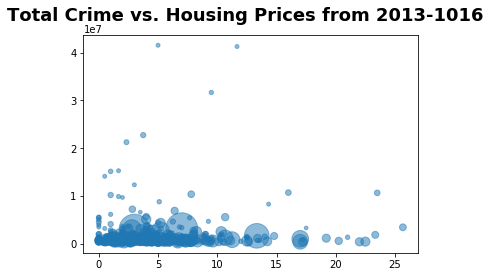

In [896]:
fig, ax = plt.subplots()

fig.suptitle("Total Crime vs. Housing Prices from 2013-1016", fontsize = 18, fontweight = 'bold')
ax.scatter(finaldf["Total_Crime"], finaldf["SALE_PRICE"],
          alpha = .5,
          s = finaldf["Average_Crime"]**2)

plt.show()

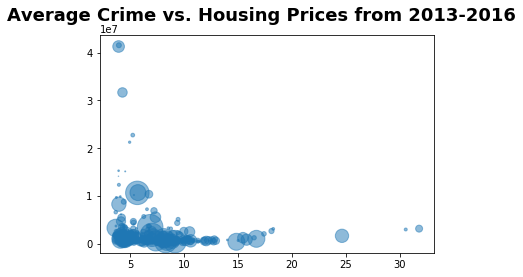

In [897]:
fig, ax = plt.subplots()

fig.suptitle("Average Crime vs. Housing Prices from 2013-2016", fontsize = 18, fontweight = 'bold')
ax.scatter(finaldf["Average_Crime"], finaldf["SALE_PRICE"],
          alpha = .5,
          s = finaldf["Total_Crime"]**2)

plt.show()

From these two scatter plots, we can observe an overall trend in crime and housing prices. The x-axis is represented by the average number of crimes and the y-axis is represented by the sale price of houses. For the Total Crime vs. Housing Prices graph, the bigger dots represent a higher amount of average crimes in that area. For the Average Crime vs. Housing Prices graph, the bigger dots represent a higher amount of total crimes for a given year. From 2013 - 2016, the graphs show that most of the dots are concentrated around the bottom left, which indicates low crime and low housing prices. However we can see that for the few data points that are on the right hand side of the graph (representing higher crimes), the housing prices tend to be low. While lower crime areas have low housing prices as well, the only data points that represent higher prices are also on the left side of the plot, also the areas with lower crime rates. 

__The next part__ of visualizing our data, we are going to break it up into __two parts__ to observe two different things: for the __first part__, we will focus on observing the crime rate vs. housing prices over the year time horizon that we have been given data for (2013-2016). This will give us information on whether there are overall changes happening over the years, such as whether crimes are decreasing or

2. Now we will break down the data by each year and visualize the data for the three time frames 2013-14, 2014-15 and 2015-16.

In [790]:
bronxmean13 = combo[combo.Borough_Name == "BRONX"]
brooklynmean13 = combo[combo.Borough_Name == "BROOKLYN"]
manhattanmean13 = combo[combo.Borough_Name == "MANHATTAN"]
queensmean13 = combo[combo.Borough_Name == "QUEENS"]
statenmean13 = combo[combo.Borough_Name == "STATEN IS"]
bronxmean13["SALE_PRICE"].mean()

1118724.96

In [791]:
brooklynmean13["SALE_PRICE"].mean()

877782.447368421

In [792]:
bronxmean14 = combo2[combo2.Borough_Name == "BRONX"]
brooklynmean14 = combo2[combo2.Borough_Name == "BROOKLYN"]
manhattanmean14 = combo2[combo2.Borough_Name == "MANHATTAN"]
queensmean14 = combo2[combo2.Borough_Name == "QUEENS"]
statenmean14 = combo2[combo2.Borough_Name == "STATEN IS"]

bronxmean15 = combo3[combo3.Borough_Name == "BRONX"]
brooklynmean15 = combo3[combo3.Borough_Name == "BROOKLYN"]
manhattanmean15 = combo3[combo3.Borough_Name == "MANHATTAN"]
queensmean15 = combo3[combo3.Borough_Name == "QUEENS"]
statenmean15 = combo3[combo3.Borough_Name == "STATEN IS"]

We will create a new dataframe with information on the mean of crime and housing statistics for 2013-2016.

In [803]:
data = [['2013-14', 'BRONX', bronxmean13["SALE_PRICE"].mean(), bronxmean13["Total_Crime"].mean()], ['2013-14', 'BROOKLYN', brooklynmean13["SALE_PRICE"].mean(), brooklynmean13["Total_Crime"].mean()],
       ['2013-14', 'MANHATTAN', manhattanmean13["SALE_PRICE"].mean(), manhattanmean13["Total_Crime"].mean()], ['2013-14', 'QUEENS', queensmean13["SALE_PRICE"].mean(), queensmean13["Total_Crime"].mean()],
       ['2013-14', 'STATEN IS', statenmean13["SALE_PRICE"].mean(), statenmean13["Total_Crime"].mean()],
       ['2014-15', 'BRONX', bronxmean14["SALE_PRICE"].mean(), bronxmean14["Total_Crime"].mean()], ['2014-15', 'BROOKLYN', brooklynmean14["SALE_PRICE"].mean(), brooklynmean14["Total_Crime"].mean()],
       ['2014-15', 'MANHATTAN', manhattanmean14["SALE_PRICE"].mean(), manhattanmean14["Total_Crime"].mean()], ['2014-15', 'QUEENS', queensmean14["SALE_PRICE"].mean(), queensmean14["Total_Crime"].mean()],
       ['2014-15', 'STATEN IS', statenmean14["SALE_PRICE"].mean(), statenmean14["Total_Crime"].mean()],
       ['2015-16', 'BRONX', bronxmean15["SALE_PRICE"].mean(), bronxmean15["Total_Crime"].mean()], ['2015-16', 'BROOKLYN', brooklynmean15["SALE_PRICE"].mean(), brooklynmean15["Total_Crime"].mean()],
       ['2015-16', 'MANHATTAN', manhattanmean15["SALE_PRICE"].mean(), manhattanmean15["Total_Crime"].mean()], ['2015-16', 'QUEENS', queensmean15["SALE_PRICE"].mean(), queensmean15["Total_Crime"].mean()],
       ['2015-16', 'STATEN IS', statenmean15["SALE_PRICE"].mean(), statenmean15["Total_Crime"].mean()]]
finalmean = pd.DataFrame(data, columns = ['Year', 'Borough_Name', 'Average_SALE_PRICE', 'Average_Total_Crime'])
finalmean["Average_SALE_PRICE"] = finalmean.Average_SALE_PRICE.astype(int)
finalmean

,Year,Borough_Name,Average_SALE_PRICE,Average_Total_Crime
0,2013-14,BRONX,1118724,3.774857
1,2013-14,BROOKLYN,877782,4.210171
2,2013-14,MANHATTAN,3026404,5.311122
3,2013-14,QUEENS,641648,3.536789
4,2013-14,STATEN IS,461636,6.789484
5,2014-15,BRONX,915980,4.087778
6,2014-15,BROOKLYN,1066377,5.135377
7,2014-15,MANHATTAN,6415353,5.802327
8,2014-15,QUEENS,665295,3.126065
9,2014-15,STATEN IS,451417,5.889947


In [866]:
finalmean.reset_index()
finalmean

,Borough_Name,Average_SALE_PRICE,Average_Total_Crime
Year,,,
2013-14,BRONX,1118724,3.774857
2013-14,BROOKLYN,877782,4.210171
2013-14,MANHATTAN,3026404,5.311122
2013-14,QUEENS,641648,3.536789
2013-14,STATEN IS,461636,6.789484
2014-15,BRONX,915980,4.087778
2014-15,BROOKLYN,1066377,5.135377
2014-15,MANHATTAN,6415353,5.802327
2014-15,QUEENS,665295,3.126065


In [869]:
test10 = finalmean.reset_index().pivot(index = 'Year', columns = 'Borough_Name',values = ['Average_SALE_PRICE','Average_Total_Crime'])

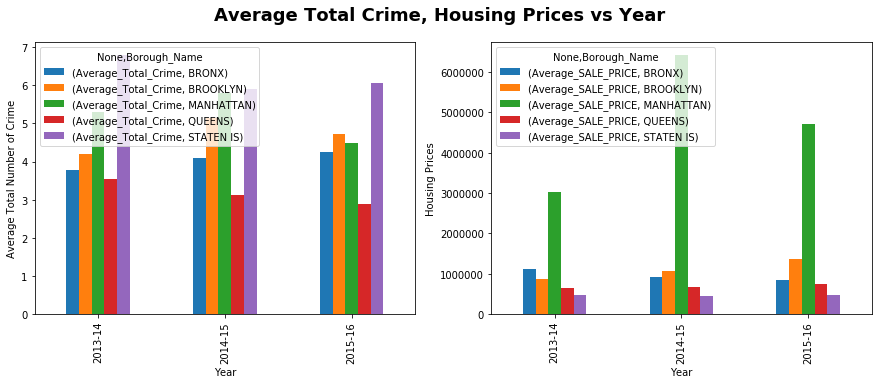

In [906]:
fig1, (ax1,ax2) = plt.subplots(1,2, sharey = False,figsize = (15,5))

test10.drop(['Average_SALE_PRICE'], axis = 1).plot(kind = 'bar',ax=ax1, label = 'Average Total Crime')
test10.drop(['Average_Total_Crime'], axis = 1).plot(kind = 'bar',ax=ax2, label = 'Housing Prices')

fig1.suptitle("Average Total Crime, Housing Prices vs Year", fontsize = 18, fontweight = 'bold')
ax1.set_ylabel('Average Total Number of Crime')
ax2.set_ylabel('Housing Prices')

plt.show()

By visualizing the data for each year, you can see if there are any changes or trends in the past few years regarding the statistics we are focusing on. For this process, we found the average sale price and average crime rate for each borough and then created a histogram to graph the changes per year. From these graphs, we can make the following conclusions:
- The average number of total crime in the Bronx increased slightly in the three year period
- The average number of total crime for both Brooklyn and Manhattan were higher in 2014-15 than in the other two years
- The average number of total crimes in Staten Island is the highest among the 5 boroughs in all three years, with only Manhattan having a similar amount in 2014-15
- Manhattan average housing prices are signficiantly higher than the other four boroughs, and Staten Island has the lowest average housing prices
- The graphs show that while Staten Island crime rates are the highest in schools, they have the lowest housing prices. This is consistent with the scatter plots above where the dots where there are higher amounts of crime, the housing prices are lower than areas with lower crime.
- Manhattan also has relatively large amounts of crime, but they have significantly higher housing prices than the other boroughs. There are other reasons for this that are unrelated to safety, but from the Total Crime vs. Housing Prices scatter plot, we can see several data points that account for this (higher crime and higher housing prices). However, they are scattered and not concentrated, suggesting that among the entire city, areas with lower crimes tend to have higher property value than areas where school safety is more of a concern. 

3. We will visualize the data for each of the boroughs, which can give us information on whether certain boroughs are safer than others or whether the correlation between pricing and safety is stronger in one area than another. We can control for the passage of time by the fact that the time period we had data for was a relatively short period of time and from the graphs in part 2, we can see that there weren't any major disruptions towards the general data trends so we can assume that the trends for each borough through the three years are relatively representative for each borough for the recent years.

In [901]:
totalmean = finalmean.reset_index().groupby(["Borough_Name"]).mean()
totalmean["Average_SALE_PRICE"] = totalmean.Average_SALE_PRICE.astype(int)
totalmean

,Average_SALE_PRICE,Average_Total_Crime
Borough_Name,,
BRONX,961087,4.034556
BROOKLYN,1104906,4.690719
MANHATTAN,4716228,5.201280
QUEENS,680368,3.186657
STATEN IS,459395,6.243717


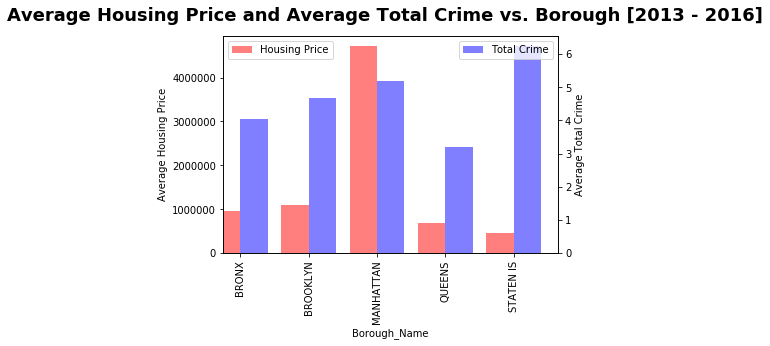

In [928]:
fig = plt.figure() # Create matplotlib figure

fig.suptitle("Average Housing Price and Average Total Crime vs. Borough [2013 - 2016]", fontsize = 18, fontweight = 'bold')

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

totalmean.Average_SALE_PRICE.plot(kind='bar', color='red', ax=ax, alpha = .5, width=width, position=1, label = 'Housing Price')
totalmean.Average_Total_Crime.plot(kind='bar', color='blue', ax=ax2, alpha = .5, width=width, position=0, label = 'Total Crime')

ax.set_ylabel('Average Housing Price')
ax2.set_ylabel('Average Total Crime')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.show()

Our third graph shows the average housing price and average total crime by borough (by calculating the means of each for the three years we have data for). This side by side comparison allows us to look at the results by sectors of the city. A few conclusions from this graph are:
- Queens has the total average crime around schools and Staten Island has the most. However, both of these boroughs have the lowest housing prices. 
- On the other hand, Manhattan has very high housing prices and one of the highest crime rates at schools.
- This graph suggests that the correlation between housing prices and total crime may not be that signficant. The rates of crime around schools do not differ that significantly, and housing prices are generally lower in areas with higher crime, but the case of Manhattan and Queens goes against that correlation. 
- We can conclude that a weak correlation may exist but the difference in housing prices are probably best explained by other factors.

In [929]:
shape_file = "C:\\me\\data bootcamp\\shape_file\\ZIP_CODE_040114.shx"

In [930]:
shape_file

'C:\\me\\data bootcamp\\shape_file\\ZIP_CODE_040114.shx'

In [931]:
nyc_map = gpd.read_file(shape_file)

In [972]:
nyc_map.rename(columns = {"ZIPCODE":"ZIP_CODE"}, inplace = True)
nyc_map["ZIP_CODE"] = nyc_map["ZIP_CODE"].astype(int)

In [988]:
newmap = pd.merge(nyc_map, finaldf,
                on = ["ZIP_CODE"],
                how = "inner",
                indicator = 'exists')
newmap

,ZIP_CODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,SHAPE_LEN,geometry,Year,Borough_Name,SALE_PRICE,Total_Crime,Average_Crime,Standard_deviation,_merge,exists
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",2013-14,QUEENS,283596,2.500000,4.280000,-1.780000,both,both
1,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",2014-15,QUEENS,678344,6.666667,4.210000,2.456667,both,both
2,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",2015-16,QUEENS,348142,6.333333,4.076667,2.256667,both,both
3,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",2013-14,BROOKLYN,701227,2.000000,4.830000,-2.830000,both,both
4,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",2014-15,BROOKLYN,1159522,4.000000,4.040000,-0.040000,both,both
5,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",2015-16,BROOKLYN,1404367,5.000000,3.910000,1.090000,both,both
6,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",2013-14,BROOKLYN,665864,6.800000,4.872000,1.928000,both,both
7,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",2014-15,BROOKLYN,1003881,6.727273,4.489091,2.238182,both,both
8,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",2015-16,BROOKLYN,1771806,10.272727,4.419091,5.853636,both,both
9,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",2013-14,BROOKLYN,1092408,13.400000,8.114000,5.286000,both,both


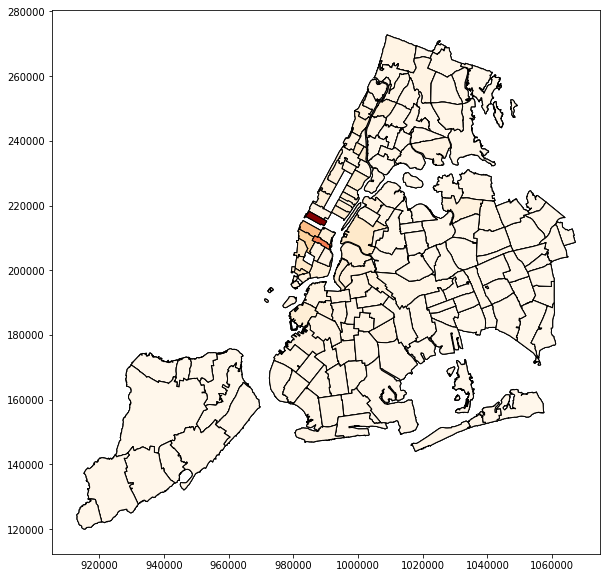

In [989]:
fig, ax = plt.subplots(figsize = (10,10))

newmap.plot(ax = ax,
            column = "SALE_PRICE",
            edgecolor = "k",
            cmap = "OrRd"
            )

plt.show()

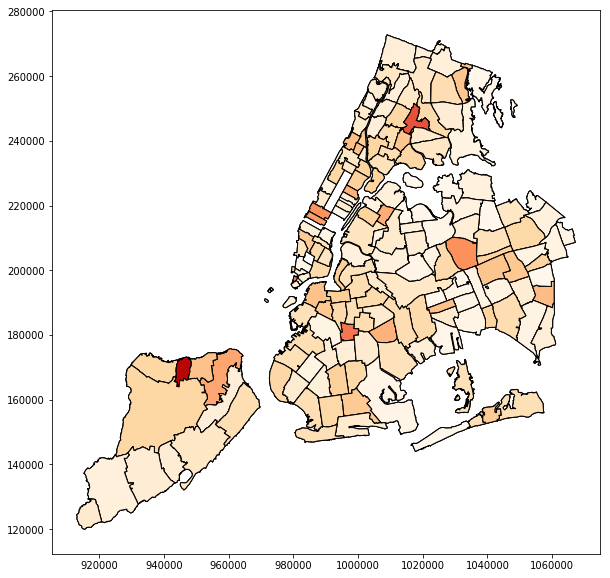

In [990]:
fig, ax = plt.subplots(figsize = (10,10))

newmap.plot(ax = ax,
            column = "Total_Crime",
            edgecolor = "k",
            cmap = "OrRd"
            )

plt.show()

Lastly, we imported a shapefile of NYC to better visualize our statistics on a geographical map. From the map showing housing prices, we can see that the Manhattan area is signficantly darker, representing higher prices. From the second map showing average total crime rates for 2013-2016, we can see areas where there are more crimes in schools. This map could be useful to visualize regions where school safety is more of an issue and could be addressed. 

__In conclusion__, to recap, we mainly used NYC Open Source as our data source. We read in data for school safety and housing sale prices for three years, 2013-14, 2014-15 and 2015-16. Ideally, we would have analyzed this data over a longer period of time but the accessible data we found was limited so we worked with what we had. We organized the data into various ways with dataframes by year, borough and zip code. The statistics we focused on included Total Crime, Average Total Crime and Sale Prices. We merged our school safety data frame with the housing data to form new dataframes. In the last part, we were able to draw some conclusions from the visualizations we produced. 

We did not find a strong correlation with school safety and housing prices for the NYC boroughs. We found that Manhattan had very high housing prices and also higher relative school crimes, while Queens had low housing prices but also had one of the lowest school crime rates. However, in general, as shown through the scatter plots which plotted Zip code data for all boroughs and all years, areas with lower crime rates contained higher housing prices. A possibile explanation for this could simply be that people want to live in safe school areas for the benefit of their children. A better safety area near schools also could imply higher standard of living since negative activit affects the community less. 